In [ ]:
# this is blah blah 
# actually really intersted to see if DS/ML can figure out 

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from pandas.api.types import is_string_dtype, is_numeric_dtype

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

In [67]:
location = 'C:/Users/bscot/OneDrive/Documents/Top Down Football/Game Data'
df = pd.read_csv(os.path.join(location, 'nfl_pbpdata.csv'))
df.shape


C:\Users\bscot\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (10,13,18,19,20,23,25,28,35,37,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(318408, 40)

In [68]:
# call various methods to get a sense of data 

In [69]:
df.shape
df.dtypes
df.head()
df.info()
df.nunique()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318408 entries, 0 to 318407
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   GameId                          318408 non-null  int64  
 1   GameDate                        318408 non-null  object 
 2   Quarter                         318408 non-null  int64  
 3   Minute                          318408 non-null  int64  
 4   Second                          318408 non-null  int64  
 5   OffenseTeam                     295262 non-null  object 
 6   DefenseTeam                     318408 non-null  object 
 7   Down                            318408 non-null  int64  
 8   ToGo                            318408 non-null  int64  
 9   YardLine                        318408 non-null  int64  
 10  SeriesFirstDown                 318408 non-null  object 
 11  NextScore                       318408 non-null  int64  
 12  Description     

,GameId,Quarter,Minute,Second,Down,ToGo,YardLine,NextScore,SeasonYear,Yards,IsTouchdown,IsChallenge,IsMeasurement,IsInterception,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,YardLineFixed
count,3.184080e+05,318408.000000,318408.000000,318408.000000,318408.000000,318408.000000,318408.000000,318408.0,318406.000000,318403.000000,318408.000000,318408.000000,318405.0,318408.000000,318408.000000,318407.000000,318408.000000,318406.000000
mean,2.016066e+09,2.574879,6.376551,27.370603,1.678240,7.268922,44.713421,0.0,2015.900046,4.192690,0.030473,0.005600,0.0,0.010502,0.084417,0.002107,0.001027,26.605036
std,1.986691e+06,1.127759,4.662901,18.292418,1.174125,4.935955,26.926983,0.0,8.975098,9.694912,0.171886,0.074622,0.0,0.115381,0.278012,0.045858,0.032030,14.343023
min,2.013090e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-23.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.014113e+09,2.000000,2.000000,11.000000,1.000000,3.000000,25.000000,0.0,2014.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,16.000000
50%,2.016102e+09,3.000000,6.000000,27.000000,2.000000,9.000000,40.000000,0.0,2016.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,28.000000
75%,2.018092e+09,4.000000,10.000000,43.000000,2.000000,10.000000,65.000000,0.0,2018.000000,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,38.000000
max,2.019122e+09,5.000000,15.000000,59.000000,4.000000,48.000000,99.000000,0.0,2019.000000,2013.000000,1.000000,1.000000,0.0,31.000000,1.000000,1.000000,1.000000,50.000000


In [70]:
# drop cols w only zero
df = df.loc[:, (df != 0).any(axis=0)]
df.shape

(318408, 39)

In [71]:
# drop team name string cols
df = df.drop(['OffenseTeam','DefenseTeam','PenaltyTeam'], axis=1)
df.shape

(318408, 36)

In [72]:
# convert datetime col to include seasonality 
df['GameDate'] = pd.to_datetime(df['GameDate'])
#
df['Month of Year'] = df['GameDate'].dt.month
df['Day of Year'] = df['GameDate'].dt.dayofyear 
df = df.drop('GameDate', axis=1)
df.shape

(318408, 37)

In [73]:
# drop additional
df = df.drop(['IsMeasurement','Description','TeamWin'], axis=1)

df.shape

(318408, 34)

In [74]:
df.describe()

,GameId,Quarter,Minute,Second,Down,ToGo,YardLine,SeasonYear,Yards,IsTouchdown,IsChallenge,IsInterception,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,YardLineFixed,Month of Year,Day of Year
count,3.184080e+05,318408.000000,318408.000000,318408.000000,318408.000000,318408.000000,318408.000000,318406.000000,318403.000000,318408.000000,318408.000000,318408.000000,318408.000000,318407.000000,318408.000000,318406.000000,318408.000000,318408.000000
mean,2.016066e+09,2.574879,6.376551,27.370603,1.678240,7.268922,44.713421,2015.900046,4.192690,0.030473,0.005600,0.010502,0.084417,0.002107,0.001027,26.605036,10.341182,299.704982
std,1.986691e+06,1.127759,4.662901,18.292418,1.174125,4.935955,26.926983,8.975098,9.694912,0.171886,0.074622,0.115381,0.278012,0.045858,0.032030,14.343023,1.820903,56.938104
min,2.013090e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.014113e+09,2.000000,2.000000,11.000000,1.000000,3.000000,25.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,10.000000,274.000000
50%,2.016102e+09,3.000000,6.000000,27.000000,2.000000,9.000000,40.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,11.000000,305.000000
75%,2.018092e+09,4.000000,10.000000,43.000000,2.000000,10.000000,65.000000,2018.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,12.000000,336.000000
max,2.019122e+09,5.000000,15.000000,59.000000,4.000000,48.000000,99.000000,2019.000000,2013.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,50.000000,12.000000,365.000000


In [75]:
# identify numeric / non numeric cols
df_numeric = df.select_dtypes(include=[np.number])
df_numeric_cols = df_numeric.columns.values
print('numeric cols are: ', df_numeric_cols)

df_nonnumeric = df.select_dtypes(exclude=[np.number])
df_nonnumeric_cols = df_nonnumeric.columns.values
print('non numeric cols are:', df_nonnumeric_cols)

numeric cols are:  ['GameId' 'Quarter' 'Minute' 'Second' 'Down' 'ToGo' 'YardLine'
 'SeasonYear' 'Yards' 'IsTouchdown' 'IsChallenge' 'IsInterception'
 'IsPenalty' 'IsTwoPointConversion' 'IsTwoPointConversionSuccessful'
 'YardLineFixed' 'Month of Year' 'Day of Year']
non numeric cols are: ['SeriesFirstDown' 'Formation' 'PlayType' 'IsRush' 'IsPass' 'IsIncomplete'
 'PassType' 'IsSack' 'IsChallengeReversed' 'IsFumble' 'RushDirection'
 'YardLineDirection' 'IsPenaltyAccepted' 'IsNoPlay' 'PenaltyType'
 'PenaltyYards']


In [76]:
# coerce nonnumeric cols that should be numeric
tonumeric = ['SeriesFirstDown',
    'IsRush','IsPass',
    'IsIncomplete',
    'IsSack',
    'IsChallengeReversed',
    'IsFumble',
    'IsPenaltyAccepted',
    'IsNoPlay',
    'PenaltyYards'] 

for i in tonumeric:
    df[i] = pd.to_numeric(df[i],errors='coerce')
    
# check for non numeric
# these will be one-hpt encoded shortly
df_nonnumeric = df.select_dtypes(exclude=[np.number])
df_nonnumeric_cols = df_nonnumeric.columns.values
print('non numeric cols:', df_nonnumeric_cols)

non numeric cols: ['Formation' 'PlayType' 'PassType' 'RushDirection' 'YardLineDirection'
 'PenaltyType']


<AxesSubplot:>

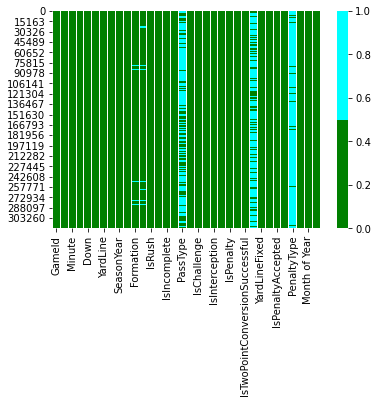

In [77]:
# visualize NaNs
cols = df.columns[:35] 
colors = ['green', 'aqua']
#fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

In [78]:
# tabulate NaNs
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values 
missing_percentage = round(missing_count / value_count * 100,2) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                                 count  percentage
GameId                               0        0.00
Quarter                              0        0.00
Minute                               0        0.00
Second                               0        0.00
Down                                 0        0.00
ToGo                                 0        0.00
YardLine                             0        0.00
SeriesFirstDown                      1        0.00
SeasonYear                           2        0.00
Yards                                5        0.00
Formation                         5169        1.62
PlayType                         10679        3.35
IsRush                               2        0.00
IsPass                               5        0.00
IsIncomplete                         6        0.00
IsTouchdown                          0        0.00
PassType                        186733       58.65
IsSack                               2        0.00
IsChallenge                    

In [79]:
# dropping SeasonYear
df = df.drop(['SeasonYear'], axis=1)
# only backfill material NaN
df['Formation'] = df['Formation'].fillna('Unknown')
df['PlayType'] = df['PlayType'].fillna('Other')
df['PassType'] = df['PassType'].fillna('NA')
df['RushDirection'] = df['RushDirection'].fillna('NA')
df['PenaltyType'] = df['PenaltyType'].fillna('Unpenalized')

# check repairs
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values 
missing_percentage = round(missing_count / value_count * 100,2) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                                count  percentage
GameId                              0         0.0
Quarter                             0         0.0
Minute                              0         0.0
Second                              0         0.0
Down                                0         0.0
ToGo                                0         0.0
YardLine                            0         0.0
SeriesFirstDown                     1         0.0
Yards                               5         0.0
Formation                           0         0.0
PlayType                            0         0.0
IsRush                              2         0.0
IsPass                              5         0.0
IsIncomplete                        6         0.0
IsTouchdown                         0         0.0
PassType                            0         0.0
IsSack                              2         0.0
IsChallenge                         0         0.0
IsChallengeReversed                 5         0.0


In [80]:
# drop all remaining rows w Nan
df = df.dropna()
# check
df.isnull().values.any()
df.shape

(318399, 33)

In [81]:
# begin one hot encoding

# find remaining object cols for Label Encoder
# Label Encoder cant deal with NaNs
onehot_find = df.select_dtypes(include=[object]).replace(np.nan, 'none', regex=True)
onehot_find.head()

,Formation,PlayType,PassType,RushDirection,YardLineDirection,PenaltyType
0,SHOTGUN,PASS,SHORT LEFT,NA,OPP,Unpenalized
1,SHOTGUN,PASS,SHORT LEFT,NA,OPP,Unpenalized
2,SHOTGUN,PASS,SHORT RIGHT,NA,OPP,Unpenalized
3,SHOTGUN,PASS,SHORT RIGHT,NA,OPP,DEFENSIVE OFFSIDE
4,SHOTGUN,PASS,SHORT RIGHT,NA,OPP,Unpenalized


In [82]:
# get a sense how many features one-hot will add
onehot_find.nunique()

Formation             8
PlayType             17
PassType             63
RushDirection         8
YardLineDirection     2
PenaltyType          70
dtype: int64

In [83]:
# encode labels
le = preprocessing.LabelEncoder()
# use df.apply() to apply le.fit_transform to all columns
onehot_encode = onehot_find.apply(le.fit_transform)
onehot_encode.head()

,Formation,PlayType,PassType,RushDirection,YardLineDirection,PenaltyType
0,4,8,51,4,0,68
1,4,8,51,4,0,68
2,4,8,53,4,0,68
3,4,8,53,4,0,9
4,4,8,53,4,0,68


In [84]:
# onehot object
encoder = preprocessing.OneHotEncoder()
# fit
encoder.fit(onehot_find)
# transform
onehot_array = encoder.transform(onehot_find).toarray()
onehot_array = pd.DataFrame(onehot_array)
# add column names
onehot_array.columns = encoder.get_feature_names(['Formation', 'PlayType','PassType','RushDirection','YardLineDirection','PenaltyType'])

onehot_array.columns

Index(['Formation_FIELD GOAL', 'Formation_NO HUDDLE',
       'Formation_NO HUDDLE SHOTGUN', 'Formation_PUNT', 'Formation_SHOTGUN',
       'Formation_UNDER CENTER', 'Formation_Unknown', 'Formation_WILDCAT',
       'PlayType_CLOCK STOP', 'PlayType_EXCEPTION',
       ...
       'PenaltyType_ROUGHING THE PASSER',
       'PenaltyType_RUNNING INTO THE KICKER', 'PenaltyType_SHORT FREE KICK',
       'PenaltyType_TAUNTING', 'PenaltyType_TOUCHBACK.',
       'PenaltyType_TRIPPING', 'PenaltyType_UNNECESSARY ROUGHNESS',
       'PenaltyType_UNSPORTSMANLIKE CONDUCT', 'PenaltyType_Unpenalized',
       'PenaltyType_YAC 14.  A FLAG WAS THROWN'],
      dtype='object', length=168)

In [85]:
# save cleaned df sans one-hot
df_numeric = df.select_dtypes([np.number])
df_numeric.to_csv (r'C:/Users/bscot/OneDrive/Documents/Top Down Football/Game Data/nfl_pbpdata_cleaned.csv', index = False, header=True)

In [86]:
# bring back in 
location = 'C:/Users/bscot/OneDrive/Documents/Top Down Football/Game Data'
unsupervised = pd.read_csv(os.path.join(location, 'nfl_pbpdata_cleaned.csv'))
print(unsupervised.shape)

# add one-hot to dataframe
onehot_array = pd.DataFrame(onehot_array)
unsupervised_onehot = pd.concat([unsupervised, onehot_array], axis=1)
unsupervised_onehot.to_csv (r'C:/Users/bscot/OneDrive/Documents/Top Down Football/Game Data/unsupervised_onehot.csv', index = False, header=True)
print(unsupervised_onehot.shape)

(318399, 27)
(318399, 195)


In [93]:
# scale data un an unsupervised manner 
transformer = StandardScaler().fit(unsupervised)
unsupervised_scaled = transformer.transform(unsupervised)
unsupervised_scaled = pd.DataFrame(unsupervised_scaled, columns = unsupervised.columns)
unsupervised_scaled.describe()

,GameId,Quarter,Minute,Second,Down,ToGo,YardLine,SeriesFirstDown,Yards,IsRush,...,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,YardLineFixed,IsPenaltyAccepted,IsNoPlay,PenaltyYards,Month of Year,Day of Year
count,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,...,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05
mean,-1.099977e-14,-5.202959e-16,5.450873e-15,-1.450932e-15,8.448777e-15,3.645782e-15,2.976747e-15,-5.436558e-15,-2.029011e-15,2.080920e-14,...,3.006639e-15,6.736461e-15,4.221763e-14,4.481590e-15,2.831536e-15,1.213338e-14,2.643889e-14,-2.855354e-15,1.266050e-13,5.152183e-15
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.497980e+00,-1.396477e+00,-1.367510e+00,-1.496286e+00,-1.429349e+00,-1.472630e+00,-1.660538e+00,-7.415828e-01,-3.280562e+00,-6.403265e-01,...,-1.181298e-01,-3.036432e-01,-4.595508e-02,-3.206352e-02,-1.854990e+00,-2.826218e-01,-2.401906e-01,-2.345320e-01,-5.129938e+00,-5.246109e+00
25%,-9.834464e-01,-5.097624e-01,-9.385912e-01,-8.949413e-01,-5.776538e-01,-8.648497e-01,-7.321048e-01,-7.415828e-01,-5.045262e-01,-6.403265e-01,...,-1.181298e-01,-3.036432e-01,-4.595508e-02,-3.206352e-02,-7.394362e-01,-2.826218e-01,-2.401906e-01,-2.345320e-01,-1.873634e-01,-4.514495e-01
50%,1.808724e-02,3.769525e-01,-8.075266e-02,-2.025852e-02,2.740412e-01,3.507112e-01,-1.750449e-01,-7.415828e-01,-5.045262e-01,-6.403265e-01,...,-1.181298e-01,-3.036432e-01,-4.595508e-02,-3.206352e-02,9.722915e-02,-2.826218e-01,-2.401906e-01,-2.345320e-01,3.618115e-01,9.299909e-02
75%,1.019726e+00,1.263667e+00,7.770859e-01,8.544242e-01,2.740412e-01,5.533046e-01,7.533884e-01,1.348467e+00,2.196571e-01,1.561703e+00,...,-1.181298e-01,-3.036432e-01,-4.595508e-02,-3.206352e-02,7.944503e-01,-2.826218e-01,-2.401906e-01,-2.345320e-01,9.109864e-01,6.374476e-01
max,1.538181e+00,2.150382e+00,1.849384e+00,1.729107e+00,1.977431e+00,8.251857e+00,2.016058e+00,1.348467e+00,1.204799e+01,1.561703e+00,...,8.465262e+00,3.293339e+00,2.176038e+01,3.118809e+01,1.631116e+00,3.538298e+00,4.163360e+00,2.497562e+01,9.109864e-01,1.146770e+00


In [31]:
# save scaled version down 
unsupervised_scaled.to_csv (r'C:/Users/bscot/OneDrive/Documents/Top Down Football/Game Data/unsupervised_scaled.csv', index = False, header=True)

In [147]:
# drop some noisy features 
# this is decided
unsupervised_scaled_v2 = unsupervised_scaled.drop(['GameId',
                                                   'Quarter',
                                                   'Minute',
                                                   'Second',
                                                   'IsChallenge',
                                                   'IsChallengeReversed',
                                                   'IsPenalty',
                                                   'IsTwoPointConversion',
                                                   'IsTwoPointConversionSuccessful',
                                                   'YardLineFixed',
                                                   'IsPenaltyAccepted',
                                                   'IsNoPlay',
                                                   'PenaltyYards'], axis=1)
unsupervised_scaled_v2.shape

(318399, 14)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(1, 0, 'GameId'),
  Text(2, 0, 'Quarter'),
  Text(3, 0, 'Minute'),
  Text(4, 0, 'Second'),
  Text(5, 0, 'Down'),
  Text(6, 0, 'ToGo'),
  Text(7, 0, 'YardLine'),
  Text(8, 0, 'SeriesFirstDown'),
  Text(9, 0, 'Yards'),
  Text(10, 0, 'IsRush'),
  Text(11, 0, 'IsPass'),
  Text(12, 0, 'IsIncomplete'),
  Text(13, 0, 'IsTouchdown'),
  Text(14, 0, 'IsSack'),
  Text(15, 0, 'IsChallenge'),
  Text(16, 0, 'IsChallengeReversed'),
  Text(17, 0, 'IsInterception'),
  Text(18, 0, 'IsFumble'),
  Text(19, 0, 'IsPenalty'),
  Text(20, 0, 'IsTwoPointConversion'),
  Text(21, 0, 'IsTwoPointConversionSuccessful'),
  Text(22, 0, 'YardLineFixed'),
  Text(23, 0, 'IsPenaltyAccepted'),
  Text(24, 0, 'IsNoPlay'),
  Text(25, 0, 'PenaltyYards'),
  Text(26, 0, 'Month of Year'),
  Text(27, 0, 'Day of Year')])

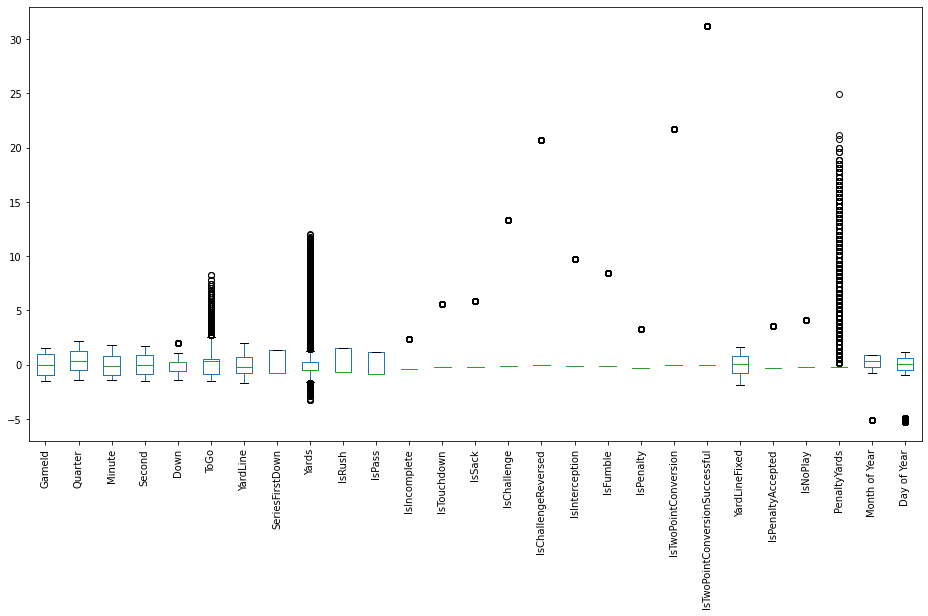

In [203]:
# get an idea of outliers from hist and predpred_box = pred.drop('delivery_id', axis=1)
unsupervised_scaled.plot(kind='box', figsize=[16,8])
plt.xticks(rotation=90)

In [202]:
unsupervised_scaled_v2.describe()

,Down,ToGo,YardLine,SeriesFirstDown,Yards,IsRush,IsPass,IsIncomplete,IsTouchdown,IsSack,IsInterception,IsFumble,Month of Year,Day of Year
count,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05,3.183990e+05
mean,8.448777e-15,3.645782e-15,2.976747e-15,-5.436558e-15,-2.029011e-15,2.080920e-14,-9.727788e-15,-8.211868e-16,2.194050e-14,-5.831208e-15,-1.210389e-16,3.006639e-15,1.266050e-13,5.152183e-15
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.429349e+00,-1.472630e+00,-1.660538e+00,-7.415828e-01,-3.280562e+00,-6.403265e-01,-8.397911e-01,-4.198002e-01,-1.772725e-01,-1.706709e-01,-1.025407e-01,-1.181298e-01,-5.129938e+00,-5.246109e+00
25%,-5.776538e-01,-8.648497e-01,-7.321048e-01,-7.415828e-01,-5.045262e-01,-6.403265e-01,-8.397911e-01,-4.198002e-01,-1.772725e-01,-1.706709e-01,-1.025407e-01,-1.181298e-01,-1.873634e-01,-4.514495e-01
50%,2.740412e-01,3.507112e-01,-1.750449e-01,-7.415828e-01,-5.045262e-01,-6.403265e-01,-8.397911e-01,-4.198002e-01,-1.772725e-01,-1.706709e-01,-1.025407e-01,-1.181298e-01,3.618115e-01,9.299909e-02
75%,2.740412e-01,5.533046e-01,7.533884e-01,1.348467e+00,2.196571e-01,1.561703e+00,1.190772e+00,-4.198002e-01,-1.772725e-01,-1.706709e-01,-1.025407e-01,-1.181298e-01,9.109864e-01,6.374476e-01
max,1.977431e+00,8.251857e+00,2.016058e+00,1.348467e+00,1.204799e+01,1.561703e+00,1.190772e+00,2.382086e+00,5.641033e+00,5.859229e+00,9.752228e+00,8.465262e+00,9.109864e-01,1.146770e+00


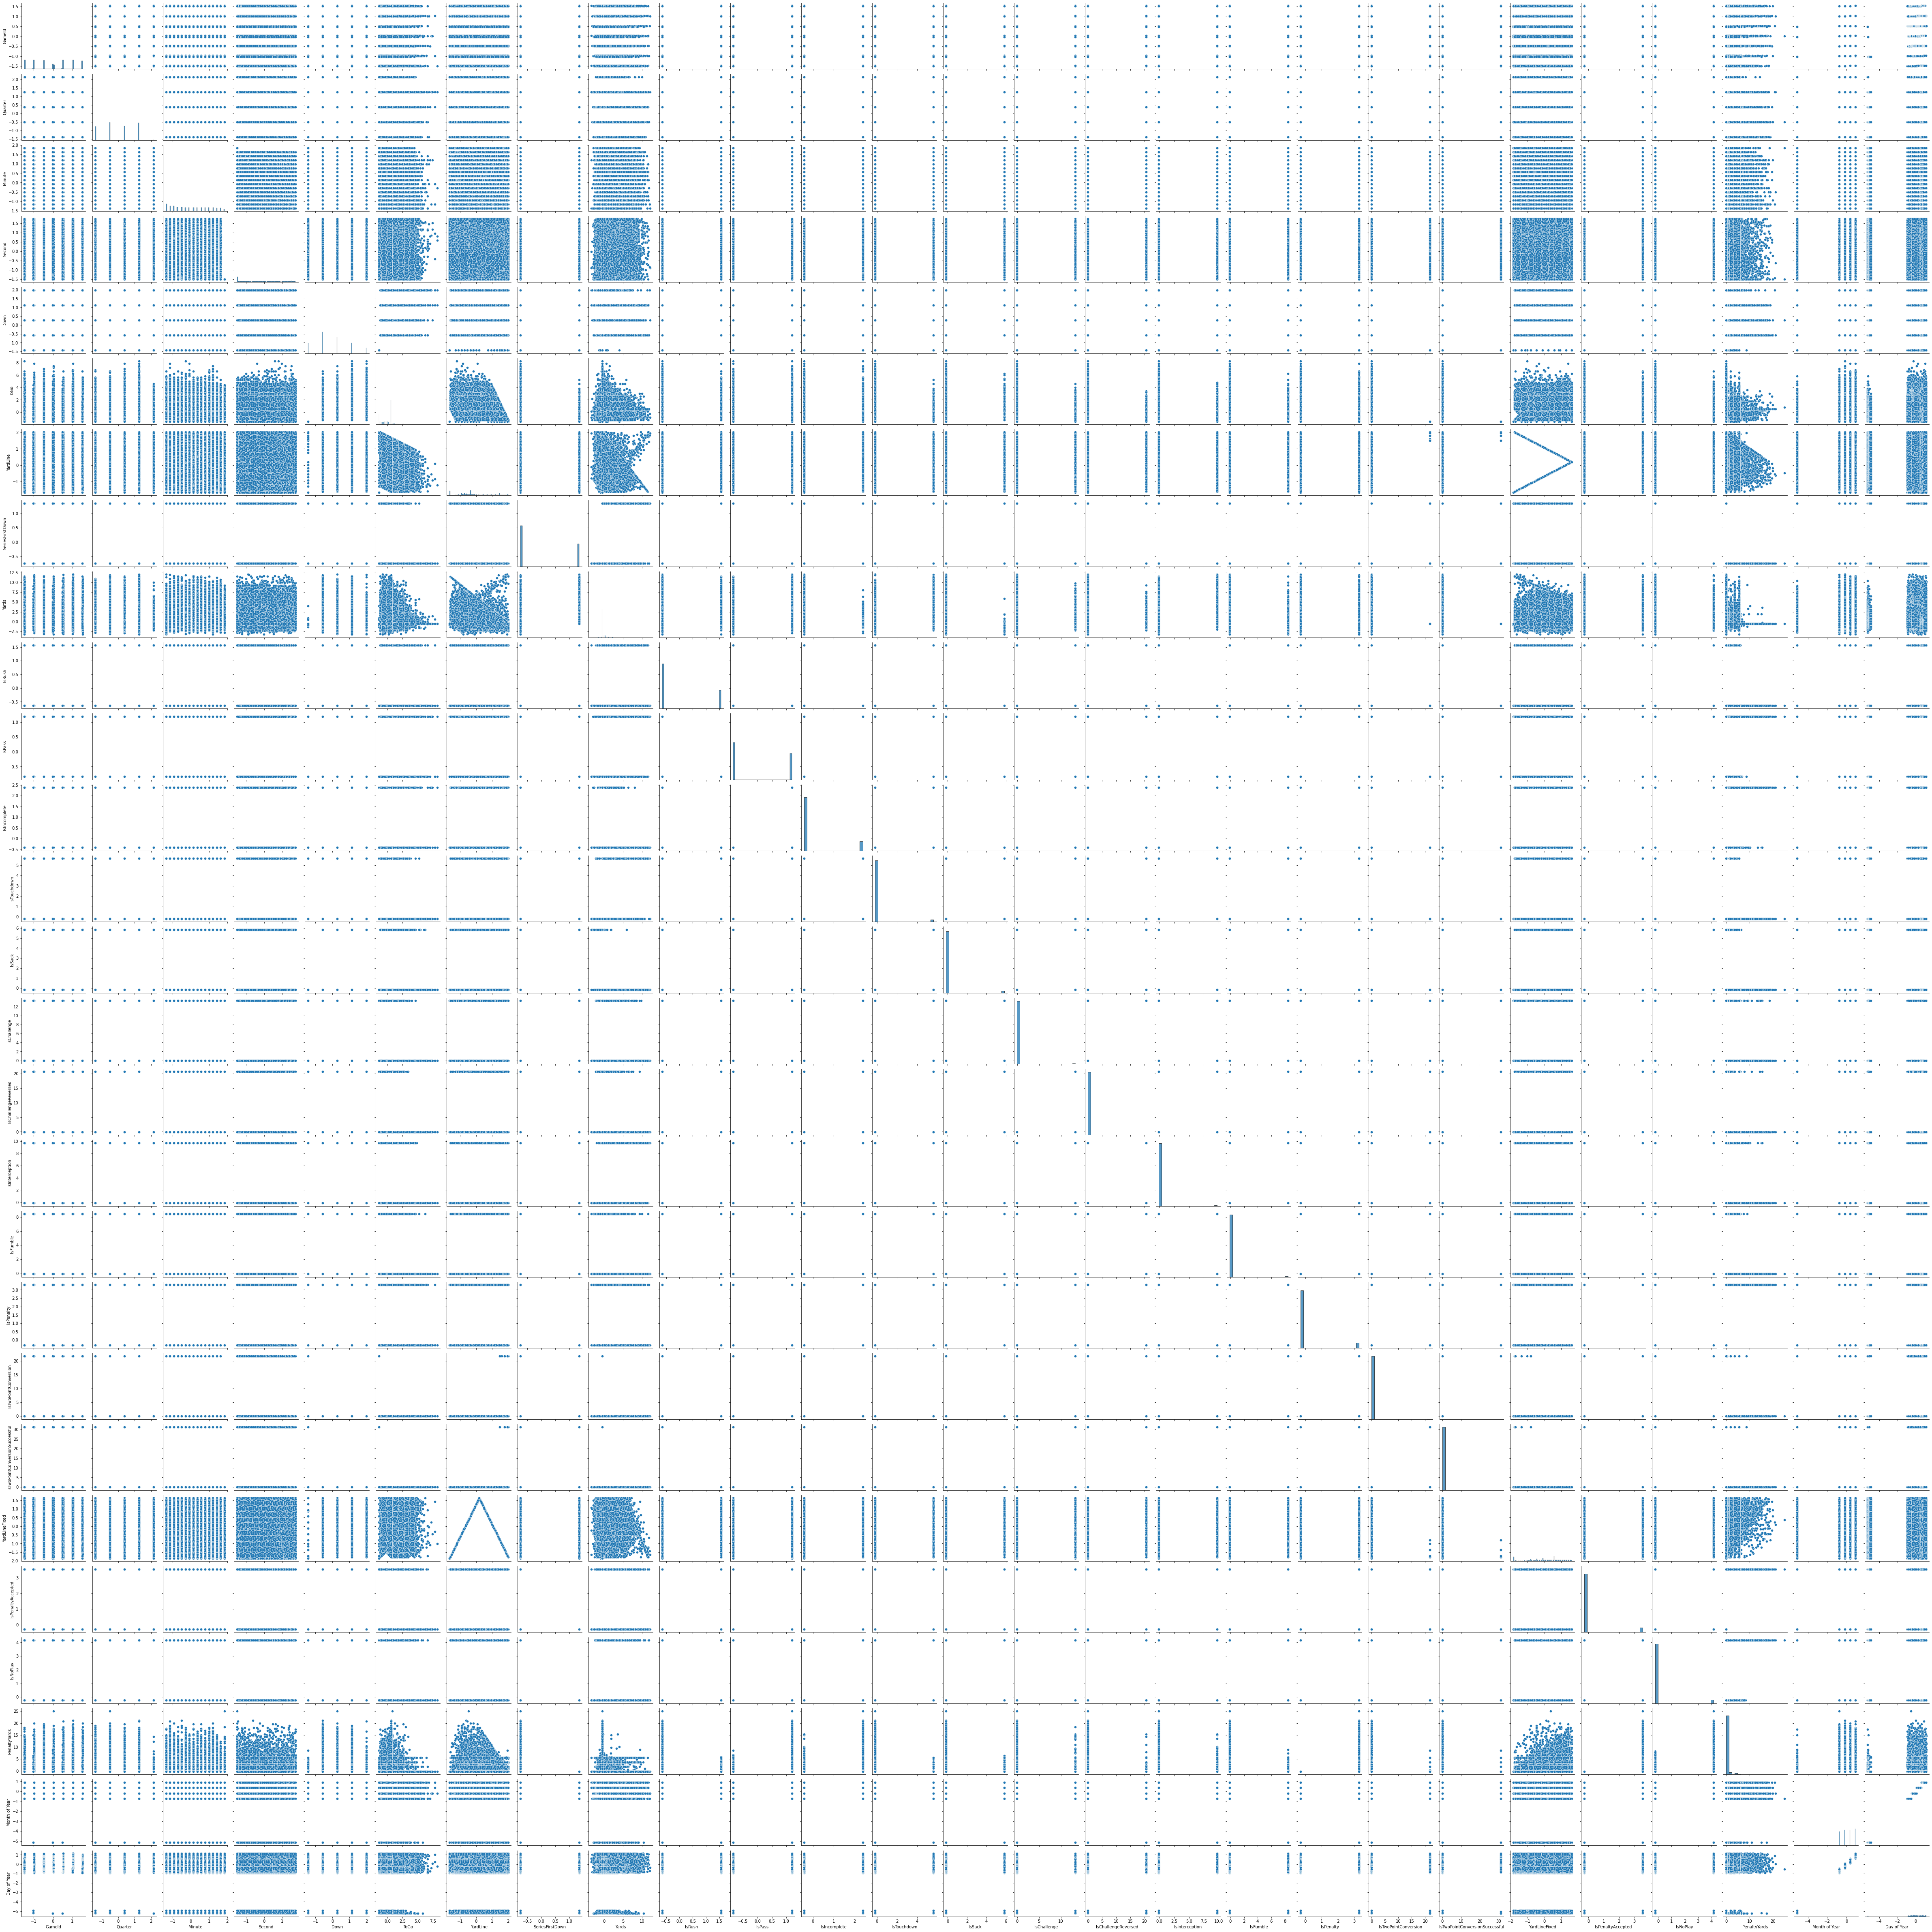

In [204]:
# Create the default pairplot
sns.pairplot(unsupervised_scaled)

<AxesSubplot:>

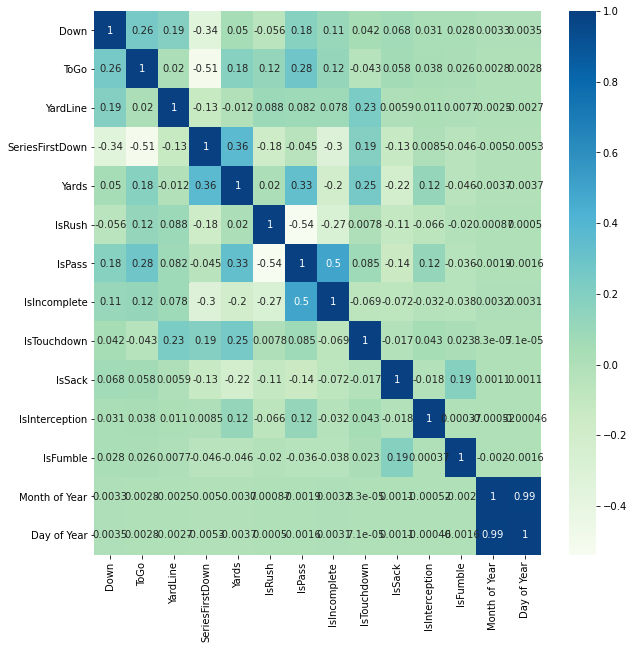

In [137]:
correlation1 = unsupervised_scaled_v2.corr()
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(correlation1, cmap = "GnBu", annot = True)

In [138]:
corr_pairs = correlation1.unstack()
print(corr_pairs)

Down         Down               1.000000
             ToGo               0.255118
             YardLine           0.191870
             SeriesFirstDown   -0.341123
             Yards              0.050420
                                  ...   
Day of Year  IsSack             0.001084
             IsInterception    -0.000462
             IsFumble          -0.001615
             Month of Year      0.988497
             Day of Year        1.000000
Length: 196, dtype: float64


In [139]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

IsPass           IsRush            -0.537741
IsRush           IsPass            -0.537741
SeriesFirstDown  ToGo              -0.507894
ToGo             SeriesFirstDown   -0.507894
Down             SeriesFirstDown   -0.341123
                                      ...   
SeriesFirstDown  SeriesFirstDown    1.000000
YardLine         YardLine           1.000000
ToGo             ToGo               1.000000
Month of Year    Month of Year      1.000000
Day of Year      Day of Year        1.000000
Length: 196, dtype: float64


In [140]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.4]
print(strong_pairs)

IsPass           IsRush            -0.537741
IsRush           IsPass            -0.537741
SeriesFirstDown  ToGo              -0.507894
ToGo             SeriesFirstDown   -0.507894
IsPass           IsIncomplete       0.499886
IsIncomplete     IsPass             0.499886
Day of Year      Month of Year      0.988497
Month of Year    Day of Year        0.988497
Down             Down               1.000000
IsFumble         IsFumble           1.000000
IsInterception   IsInterception     1.000000
IsSack           IsSack             1.000000
IsTouchdown      IsTouchdown        1.000000
IsIncomplete     IsIncomplete       1.000000
IsPass           IsPass             1.000000
IsRush           IsRush             1.000000
Yards            Yards              1.000000
SeriesFirstDown  SeriesFirstDown    1.000000
YardLine         YardLine           1.000000
ToGo             ToGo               1.000000
Month of Year    Month of Year      1.000000
Day of Year      Day of Year        1.000000
dtype: flo

In [148]:
cov_mat = np.cov(unsupervised_scaled_v2.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[2.16763814 1.98895309 1.87289138 1.49575305 0.01150258 0.18722638
 0.25264577 0.45059483 1.2440813  0.63651139 0.75261925 0.84816546
 1.14168037 0.94978098]


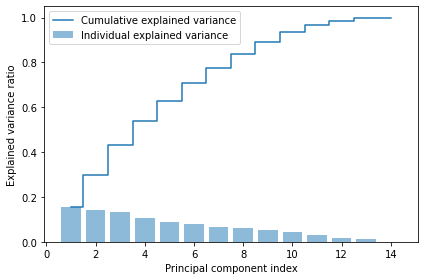

In [166]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)



plt.bar(range(1, 15), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 15), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

In [190]:
# sytematocaly clip PCA at ~X% 
var_exp = pd.DataFrame(var_exp)
n_pca = np.flatnonzero(np.isclose(var_exp.cumsum().values,0.80 , atol=0.1))[1]
n_pca

6

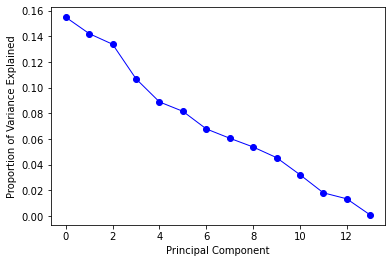

In [191]:
# cross ref w scree just to see if there are kinks
plt.plot(var_exp, 'bo-', linewidth=1)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [192]:
loadings = pd.DataFrame(eigen_vecs, index=unsupervised_scaled_v2.columns)
loadings_sum = loadings.iloc[:, : n_pca]
loadings_sum

,0,1,2,3,4,5
Down,0.365880,0.004999,-0.098898,-0.265548,-0.000028,-0.058702
ToGo,0.406898,0.003967,-0.143954,-0.345041,-0.000307,0.076736
YardLine,0.154740,0.008514,-0.020416,-0.321391,-0.000204,0.077690
SeriesFirstDown,-0.411002,0.021263,0.479508,0.105106,-0.000616,-0.187884
Yards,-0.001108,0.037273,0.489566,-0.413207,0.000098,0.417664
IsRush,-0.235432,-0.033197,-0.342722,-0.492255,-0.000290,-0.445377
IsPass,0.487037,0.049384,0.418874,0.115433,0.000281,-0.694508
IsIncomplete,0.455137,0.016584,0.028254,0.335060,-0.000420,0.297823
IsTouchdown,-0.029586,0.019219,0.289397,-0.360311,0.000066,0.000578
IsSack,0.023023,-0.018094,-0.273769,0.121685,-0.000103,-0.072634


In [193]:
# systematically sort by abs row sum
loadings_sum_abs = loadings_sum.abs().sum(axis=1)
loadings_sum_abs_sort = loadings_sum_abs.sort_values(ascending=False)
loadings_sum_abs_sort

IsPass             1.765516
IsRush             1.549273
Day of Year        1.490831
Month of Year      1.490691
Yards              1.358917
SeriesFirstDown    1.205378
IsIncomplete       1.133279
ToGo               0.976903
Down               0.794057
IsTouchdown        0.699156
YardLine           0.582954
IsSack             0.509307
IsInterception     0.378457
IsFumble           0.144686
dtype: float64

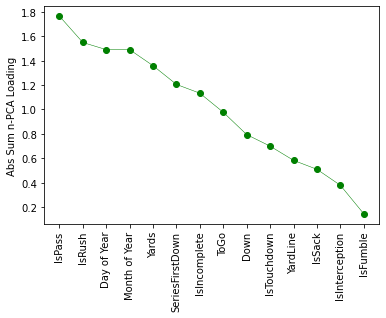

In [195]:
# check loadings for concentrations
plt.plot(loadings_sum_abs_sort, 'go-', linewidth=0.5)
plt.xticks(rotation=90)
plt.ylabel('Abs Sum n-PCA Loading')
plt.show()

In [ ]:
# begin cluster analysis 

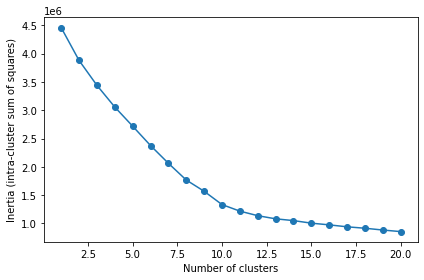

In [164]:
# selecting k via elbow
distortions = []
for i in range(1, 21):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=20, 
                max_iter=300, 
                random_state=0)
    km.fit(unsupervised_scaled_v2)
    distortions.append(km.inertia_)
plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (intra-cluster sum of squares)')
plt.tight_layout()
plt.show()

In [200]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(unsupervised_scaled_v2)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

inertia for k=3 is 2376367.314117932
cluster centers:  [[ 3.20471164e-01  2.10474870e-01  1.33227137e-01 -4.18471296e-01
  -1.50300123e-01  9.57020921e-01 -8.39725217e-01 -4.19800194e-01
  -5.06634087e-02 -1.70670932e-01 -1.02540673e-01  2.62862360e-03
   1.28820650e-01  1.30241878e-01]
 [ 1.84620918e-01  3.66543419e-01  4.70319106e-02  3.37928651e-01
   9.37199605e-01 -6.15538801e-01  1.16764610e+00 -4.13835867e-01
   2.83503733e-01 -1.70670932e-01  2.65576113e-01 -1.46955812e-02
   1.13305732e-01  1.15572273e-01]
 [-3.90200825e-03 -4.59765190e-02  3.20043715e-02  2.87314556e-02
   9.21193487e-03  2.41019654e-02 -1.24942025e-02 -6.50602702e-03
  -7.50345197e-03 -3.04030002e-02  8.76772375e-03 -2.81063674e-02
  -5.12993772e+00 -5.19566180e+00]
 [ 2.60523113e-01  2.90191407e-01  1.82670480e-01 -7.33840836e-01
  -4.98446397e-01 -6.40326532e-01  1.19077230e+00  2.38190458e+00
  -1.72636290e-01 -1.70670932e-01 -7.98318775e-02 -9.13263791e-02
   1.28878745e-01  1.30025424e-01]
 [-1.42933146

<function matplotlib.pyplot.show(close=None, block=None)>

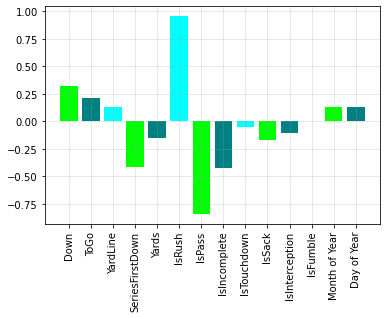

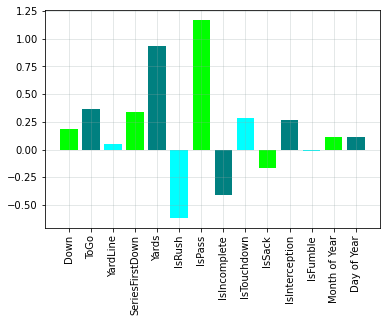

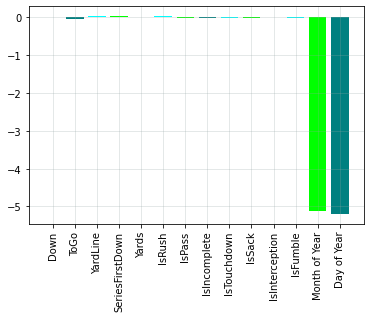

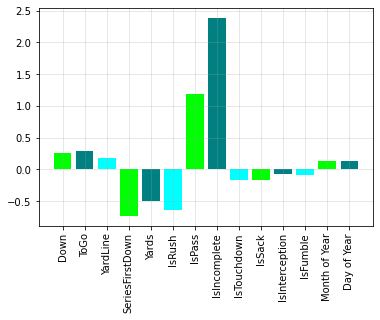

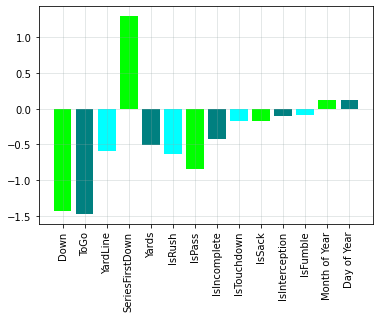

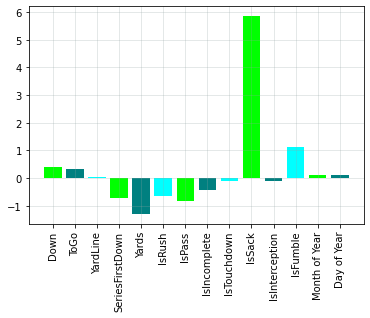

In [201]:
# plot cluster centers
x_labels = unsupervised_scaled_v2.columns.values.tolist()
clusters = kmeans.cluster_centers_.tolist()

for i in clusters:
    plt.figure()
    plt.bar(x_labels,i,color=['lime','teal','aqua'])
    plt.grid(color='#95a5a6', linewidth=0.5, alpha=0.5)
    plt.xticks(rotation=90)
    
plt.show

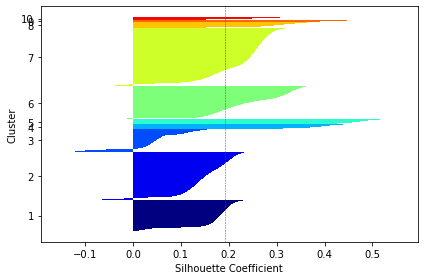

silhouette average:  0.19293598060395242


In [165]:
# selecting k via silhouette
# a distancing metric [-1,1]
# seeking uniform partitions 
km = KMeans(n_clusters=10, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(unsupervised_scaled_v2)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(unsupervised_scaled, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--",linewidth=0.5) 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')

plt.tight_layout()
plt.show()

print('silhouette average: ', silhouette_avg)